In [1]:
from typing import TypedDict, List
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage

In [3]:
llm = ChatOllama(model='qwen2.5')

In [4]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [10]:
def llm_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(f" AI : {response.content}")
    return state

In [11]:
graph = StateGraph(AgentState)
graph.add_node("llm", llm_node)

graph.add_edge(START, "llm")
graph.add_edge("llm", END)
agent = graph.compile()

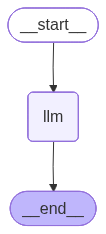

In [12]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [9]:
user_input = input("Enter something")
final_state = agent.invoke({"messages": [HumanMessage(user_input)]})

Enter something hi, how are you?


content="Hello! I'm an AI assistant created by Alibaba Cloud, so I don't have feelings or personal experiences, but I'm here and ready to help you with any questions or tasks you might have. How can I assist you today?" additional_kwargs={} response_metadata={'model': 'qwen2.5', 'created_at': '2025-11-16T10:49:06.468202728Z', 'done': True, 'done_reason': 'stop', 'total_duration': 14053840577, 'load_duration': 6754028707, 'prompt_eval_count': 35, 'prompt_eval_duration': 1495981630, 'eval_count': 48, 'eval_duration': 5801668371, 'logprobs': None, 'model_name': 'qwen2.5', 'model_provider': 'ollama'} id='lc_run--01db258c-bda8-43ca-8cd3-943af0c0b0a6-0' usage_metadata={'input_tokens': 35, 'output_tokens': 48, 'total_tokens': 83}


In [13]:
user_input = input("Human: ")
while user_input != "quit":
    final_state = agent.invoke({"messages": [HumanMessage(user_input)]})
    user_input = input("Human: ")

Human:  who build you?


 AI : I was created by Alibaba Cloud, specifically as Qwen, to assist with various tasks and provide information. If you have any questions or need help with something, feel free to ask!


Human:  my name is ali


 AI : Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?


Human:  quit
